# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\91814\Downloads\Global_Cybersecurity_Threats_2015-2024.csv")

# Data Understanding

In [3]:
df.shape

(3000, 10)

In [4]:
df.columns.tolist()

['Country',
 'Year',
 'Attack Type',
 'Target Industry',
 'Financial Loss (in Million $)',
 'Number of Affected Users',
 'Attack Source',
 'Security Vulnerability Type',
 'Defense Mechanism Used',
 'Incident Resolution Time (in Hours)']

In [5]:
df.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [7]:
df.describe(include = 'all')

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
count,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000.000000
unique,10,NaN,6,7,NaN,NaN,4,4,5,NaN
top,UK,NaN,DDoS,IT,NaN,NaN,Nation-state,Zero-day,Antivirus,NaN
freq,321,NaN,531,478,NaN,NaN,794,785,628,NaN
mean,NaN,2019.570333,NaN,NaN,50.492970,504684.136333,NaN,NaN,NaN,36.476000
std,NaN,2.857932,NaN,NaN,28.791415,289944.084972,NaN,NaN,NaN,20.570768
min,NaN,2015.000000,NaN,NaN,0.500000,424.000000,NaN,NaN,NaN,1.000000
25%,NaN,2017.000000,NaN,NaN,25.757500,255805.250000,NaN,NaN,NaN,19.000000
50%,NaN,2020.000000,NaN,NaN,50.795000,504513.000000,NaN,NaN,NaN,37.000000
75%,NaN,2022.000000,NaN,NaN,75.630000,758088.500000,NaN,NaN,NaN,55.000000


In [8]:
df.isna().sum()

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

In [11]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

4

# Data Exploration

In [12]:
# COUNTRY
df["Country"].unique()

array(['China', 'India', 'UK', 'Germany', 'France', 'Australia', 'Russia',
       'Brazil', 'Japan', 'USA'], dtype=object)

In [13]:
df["Country"].nunique()

10

In [14]:
df["Country"].value_counts()

Country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

In [15]:
df["Year"].dtype

dtype('int64')

In [16]:
# YEAR
df["Year"].unique()

array([2019, 2017, 2024, 2018, 2016, 2023, 2022, 2015, 2021, 2020],
      dtype=int64)

In [17]:
df["Year"].nunique()

10

In [18]:
df["Year"].value_counts()

Year
2017    319
2022    318
2023    315
2020    315
2018    310
2024    299
2021    299
2016    285
2015    277
2019    263
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

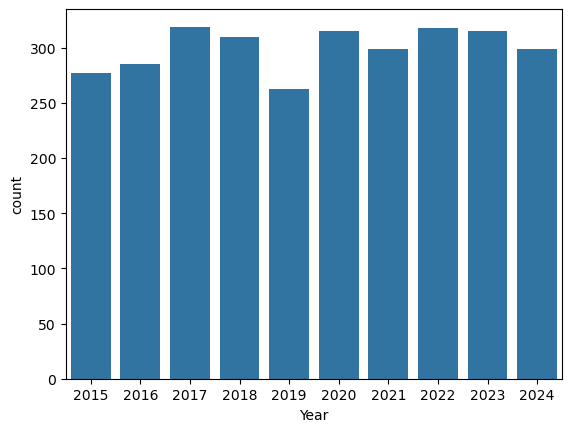

In [19]:
sns.countplot(data = df, x = 'Year')

In [20]:
df["Year"].skew()

-0.027512929994344057

<Axes: xlabel='Year', ylabel='Count'>

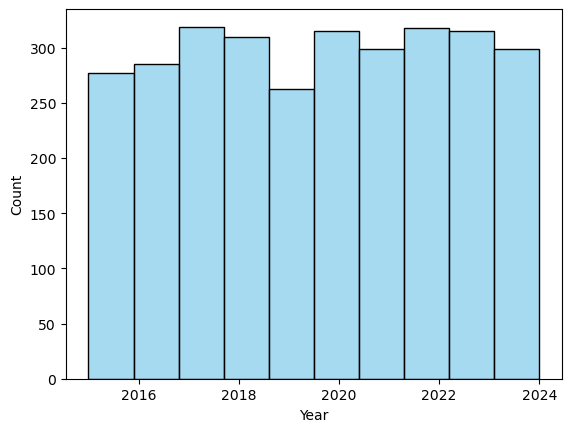

In [21]:
sns.histplot(data=df, x='Year', bins=10, kde=False, color='skyblue', edgecolor='black')

In [22]:
# ATTACK TYPE
df["Attack Type"].unique()

array(['Phishing', 'Ransomware', 'Man-in-the-Middle', 'DDoS',
       'SQL Injection', 'Malware'], dtype=object)

In [23]:
df["Attack Type"].nunique()

6

In [24]:
df["Attack Type"].value_counts()

Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

In [25]:
# TARGET INDUSTRY
df["Target Industry"].unique()

array(['Education', 'Retail', 'IT', 'Telecommunications', 'Government',
       'Banking', 'Healthcare'], dtype=object)

In [26]:
df["Target Industry"].nunique()

7

In [27]:
df["Target Industry"].value_counts()

Target Industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64

In [28]:
df["Financial Loss (in Million $)"].dtype

dtype('float64')

In [29]:
# Financial Loss (in Million $)    
df["Financial Loss (in Million $)"].unique()

array([80.53, 62.19, 38.65, ..., 32.97, 32.17, 48.2 ])

In [30]:
df["Financial Loss (in Million $)"].nunique()

2536

In [31]:
df['Financial Loss (in Million $)'].isnull().sum()

0

In [32]:
df["Financial Loss (in Million $)"].describe()

count    3000.000000
mean       50.492970
std        28.791415
min         0.500000
25%        25.757500
50%        50.795000
75%        75.630000
max        99.990000
Name: Financial Loss (in Million $), dtype: float64

In [33]:
range = df['Financial Loss (in Million $)'].max() - df['Financial Loss (in Million $)'].min()
print(range)

99.49


In [35]:
df["Financial Loss (in Million $)"].skew()

-0.016860394542015506

<Axes: xlabel='Financial Loss (in Million $)'>

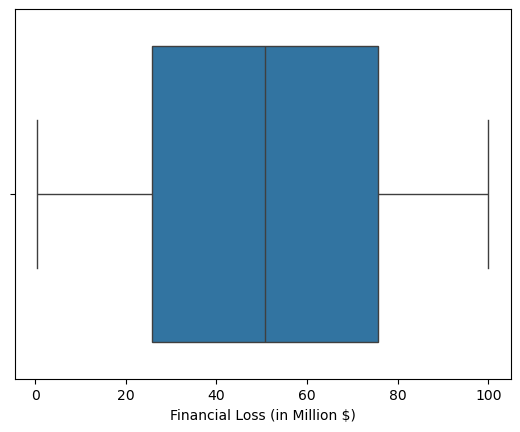

In [36]:
sns.boxplot(data = df, x ='Financial Loss (in Million $)')

In [37]:
# Number of Affected Users
df['Number of Affected Users'].dtypes

dtype('int64')

In [38]:

df["Number of Affected Users"].unique()

array([773169, 295961, 605895, ..., 734737, 379954, 480984], dtype=int64)

In [39]:
df["Number of Affected Users"].nunique()

2998

In [40]:
df["Number of Affected Users"].value_counts()

Number of Affected Users
164890    2
737958    2
3200      1
760892    1
204624    1
         ..
973654    1
78123     1
675955    1
122866    1
480984    1
Name: count, Length: 2998, dtype: int64

In [41]:
df['Number of Affected Users'].isnull().sum()

0

In [42]:
df['Number of Affected Users'].describe()

count      3000.000000
mean     504684.136333
std      289944.084972
min         424.000000
25%      255805.250000
50%      504513.000000
75%      758088.500000
max      999635.000000
Name: Number of Affected Users, dtype: float64

In [43]:
df['Number of Affected Users'].skew()

-0.025396908917175942

<Axes: xlabel='Number of Affected Users', ylabel='count'>

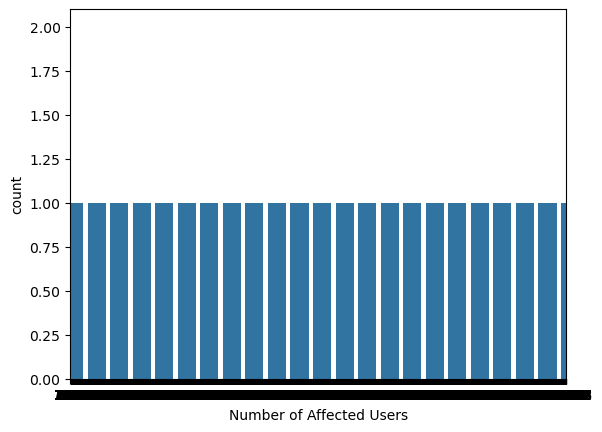

In [44]:
sns.countplot(data = df, x = 'Number of Affected Users')

In [45]:
# Attack Source    
df["Attack Source"].unique()

array(['Hacker Group', 'Nation-state', 'Insider', 'Unknown'], dtype=object)

In [46]:
df["Attack Source"].nunique()

4

In [47]:
df["Attack Source"].value_counts()

Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

In [48]:
# Security Vulnerability Type
df["Security Vulnerability Type"].unique()

array(['Unpatched Software', 'Weak Passwords', 'Social Engineering',
       'Zero-day'], dtype=object)

In [49]:
df["Security Vulnerability Type"].nunique()

4

In [50]:
df["Security Vulnerability Type"].value_counts()

Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

In [51]:
# Defense Mechanism Used
df["Defense Mechanism Used"].unique()

array(['VPN', 'Firewall', 'AI-based Detection', 'Antivirus', 'Encryption'],
      dtype=object)

In [52]:
df["Defense Mechanism Used"].nunique()

5

In [53]:
df["Defense Mechanism Used"].value_counts()

Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64

In [54]:
# Incident Resolution Time (in Hours) 
df['Incident Resolution Time (in Hours)'].dtypes

dtype('int64')

In [55]:
# Incident Resolution Time (in Hours) 
df["Incident Resolution Time (in Hours)"].unique()

array([63, 71, 20,  7, 68, 25, 34, 66, 47, 58, 29, 27, 37, 35, 64, 36, 67,
       56, 28,  6, 43, 11, 30, 32, 52, 53, 24,  9, 61, 21, 31, 70, 12, 62,
        3, 57, 69, 19, 65, 40, 17, 51, 23, 10, 14, 55, 16, 41,  5, 54,  4,
       42,  1, 15, 49, 18, 38, 22, 33,  2, 72, 50, 45, 26, 39, 48, 44, 60,
        8, 46, 13, 59], dtype=int64)

In [56]:
df["Incident Resolution Time (in Hours)"].nunique()

72

In [57]:
df["Incident Resolution Time (in Hours)"].value_counts()

Incident Resolution Time (in Hours)
43    56
54    54
20    54
29    54
37    52
      ..
36    32
52    31
60    31
50    29
1     29
Name: count, Length: 72, dtype: int64

In [58]:
df['Incident Resolution Time (in Hours)'].describe()

count    3000.000000
mean       36.476000
std        20.570768
min         1.000000
25%        19.000000
50%        37.000000
75%        55.000000
max        72.000000
Name: Incident Resolution Time (in Hours), dtype: float64

In [59]:
df['Incident Resolution Time (in Hours)'].skew()

0.011103803006331533

# Data Cleaning

In [68]:
df.shape

(3000, 10)

In [61]:
# Separate continuous columns
continuous_cols = df.select_dtypes(include=["int16", "int32", "int64", "float16", "float32", "float64"]).columns.tolist()

# Separate categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print them
print("Continuous Columns:\n", continuous_cols)
print("Categorical Columns:\n", categorical_cols)


Continuous Columns:
 ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']
Categorical Columns:
 ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']


In [62]:
df[continuous_cols].describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [63]:
df[categorical_cols].describe()

,Country,Attack Type,Target Industry,Attack Source,Security Vulnerability Type,Defense Mechanism Used
count,3000,3000,3000,3000,3000,3000
unique,10,6,7,4,4,5
top,UK,DDoS,IT,Nation-state,Zero-day,Antivirus
freq,321,531,478,794,785,628


In [64]:
# RENAME COLUMN
df.rename(columns = {'Financial Loss (in Million $)': 'Financial Loss',
                    'Incident Resolution Time (in Hours)': 'Incident Resolution Time'},inplace = True)

In [66]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss,Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# Exploratory Data Analysis

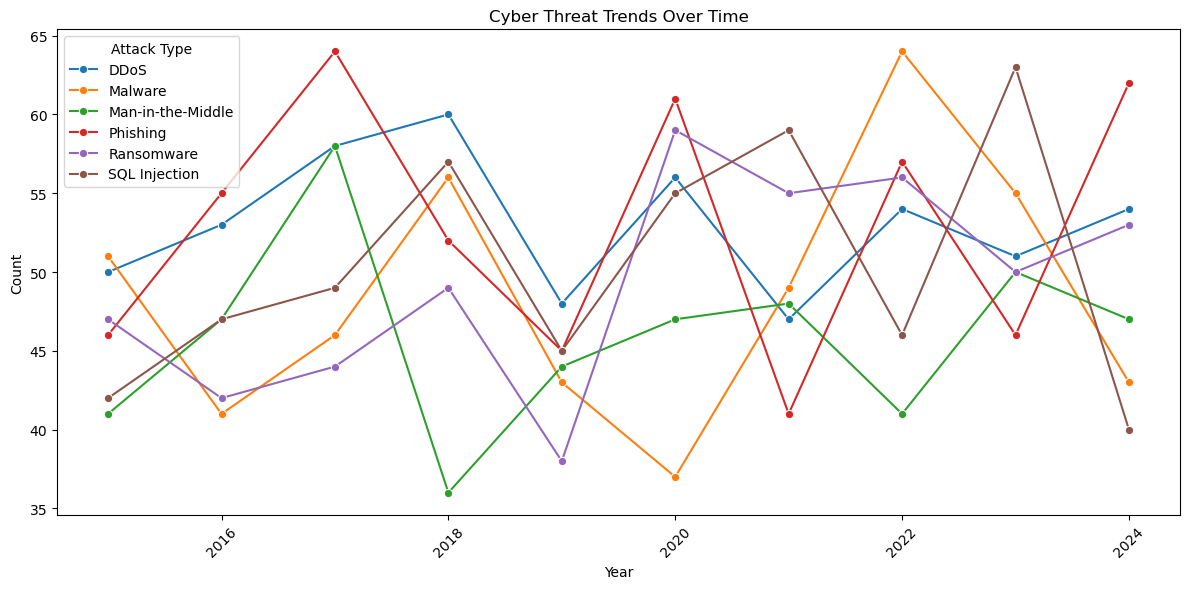

In [71]:
# EXPLORATORY DATA ANALYSIS
# 1. Cyber Threat Trend Analysis
Threat_trend = df.groupby(['Year','Attack Type']).size().reset_index(name = 'Count')
plt.figure(figsize = (12,6))
sns.lineplot(data = Threat_trend, x = 'Year', y = 'Count', hue = 'Attack Type', marker = 'o')
plt.title("Cyber Threat Trends Over Time")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



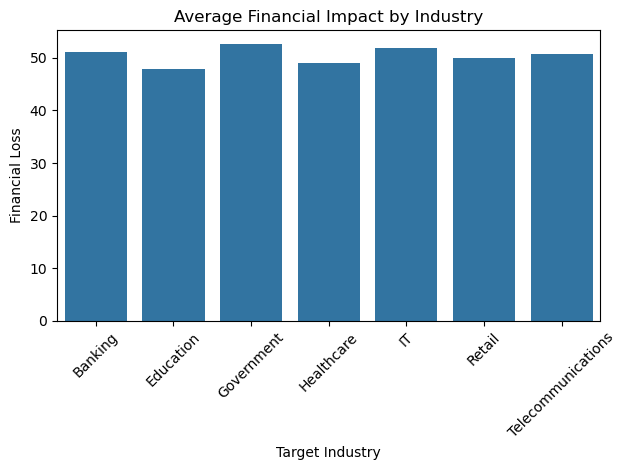

In [72]:
# 2. Industry-Specific Risk Profiling
industry_risk = df.groupby('Target Industry').agg({
    'Financial Loss': 'mean',
     'Attack Type': 'count'
}).reset_index().rename(columns={'Attack Type': 'Total Attacks'})

sns.barplot(x='Target Industry', y='Financial Loss', data=industry_risk)
plt.xticks(rotation=45)
plt.title('Average Financial Impact by Industry')
plt.tight_layout()
plt.show()


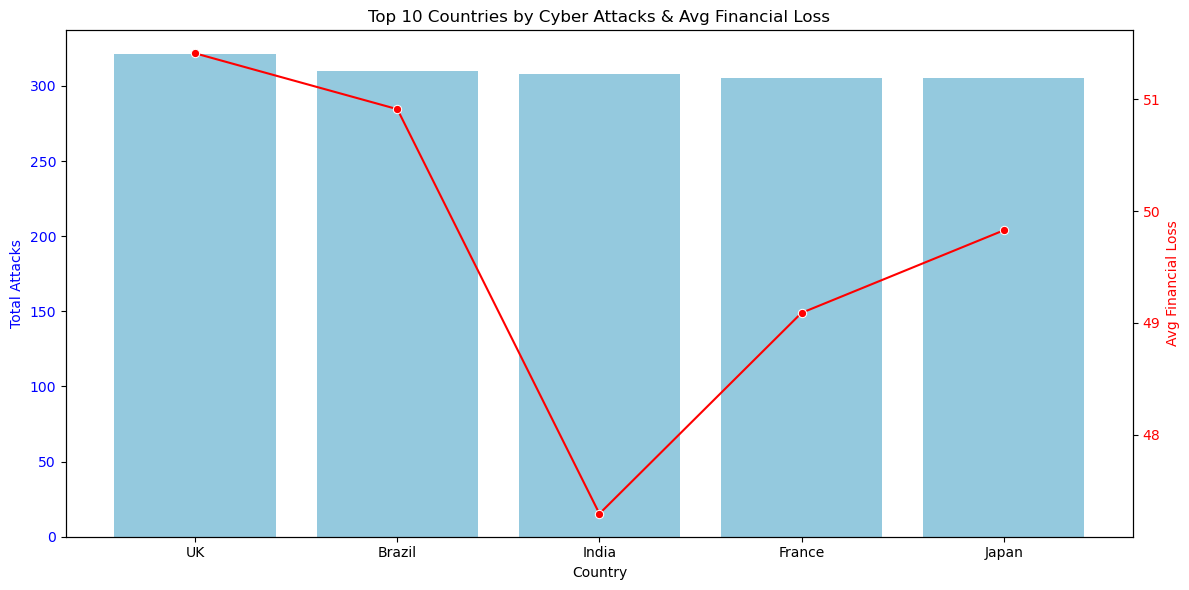

In [74]:
#3. Country-Level Risk Mapping
country_grouped = df.groupby('Country').agg({
    'Financial Loss': 'mean',
    'Attack Type': 'count'
}).reset_index().rename(columns={'Attack Type': 'Total Attacks'})
top_countries = country_grouped.sort_values(by='Total Attacks', ascending=False).head( )


fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total attacks
sns.barplot(data=top_countries, x='Country', y='Total Attacks', color='skyblue', ax=ax1)
ax1.set_ylabel('Total Attacks', color='blue')
ax1.set_title('Top 10 Countries by Cyber Attacks & Avg Financial Loss')
ax1.tick_params(axis='y', labelcolor='blue')

# Twin axis for financial loss
ax2 = ax1.twinx()
sns.lineplot(data=top_countries, x='Country', y='Financial Loss', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Avg Financial Loss', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


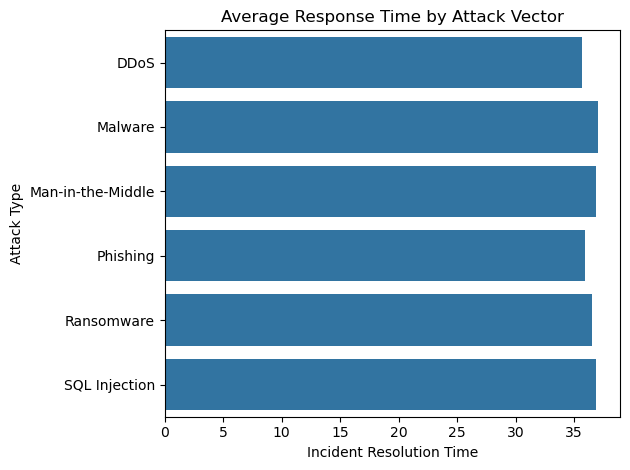

In [75]:
# 4. Response Time Optimization
vector_response = df.groupby('Attack Type')['Incident Resolution Time'].mean().reset_index()

sns.barplot(x='Incident Resolution Time', y='Attack Type', data=vector_response)
plt.title('Average Response Time by Attack Vector')
plt.tight_layout()
plt.show()
